In [1]:
import torch

In [2]:
# 0으로 채워진 5 * 3 행렬 생성
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [4]:
i = torch.ones((5, 3), dtype = torch.int16)
print(i)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float16)


In [5]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor: ')
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1: ')
print(r3)

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor: 
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1: 
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [6]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3)
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
torch.Size([2, 3])


In [8]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# 역행렬:
print('\nInverse sine of r:')
print(torch.asin(r))

# 행렬식이나 특이값 분해도 가능
print('\nDeterminant of r:')
print(torch.det(r))

# 특이값 분해
print('\nSingular value decomposition of r:')
print(torch.svd(r))

#  std_mean, max
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.7231, -0.0482],
        [ 0.4961, -0.9278]])

Absolute value of r:
tensor([[0.7231, 0.0482],
        [0.4961, 0.9278]])

Inverse sine of r:
tensor([[-0.8083, -0.0482],
        [ 0.5191, -1.1884]])

Determinant of r:
tensor(0.6948)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.4003,  0.9164],
        [ 0.9164,  0.4003]]),
S=tensor([1.1154, 0.6229]),
V=tensor([[ 0.6672, -0.7449],
        [-0.7449, -0.6672]]))

Average and standard deviation of r:
(tensor(0.6507), tensor(-0.3007))

Maximum value of r:
tensor(0.4961)


# 파이토치 모델

In [9]:
import torch
import torch.nn as nn # nn.Module, 파이토치 모델을 위한 부모 오브젝트
import torch.nn.functional as F # activation function

- nn.Module을 중첩될 수 있으며 Conv2d 및 Linear 계층 클래스도 상속함
- __init__() 계층을 인스턴스화하고 필요한 데이터 아티팩트를 로드함
- 모델에는 forward 기능 존재
- 모델 계산을 지원하는데 필요한 속성과 메서드 추가가능

In [12]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [13]:
net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32)
print('\nImage batch shape:')
print(input.shape)

output = net(input)
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.1096,  0.0463, -0.0538,  0.0553, -0.0344, -0.1371,  0.0571,  0.0170,
          0.0577, -0.0466]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


# 데이터 세트 및 데이터 로더

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [15]:
trainset = torchvision.datasets.CIFAR10(root = "./data", train = True, download = True, transform = transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [17]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

plane horse   dog  ship


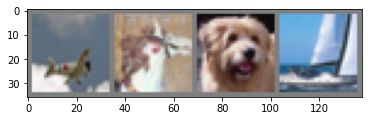

In [20]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Pytorch 모델 훈련

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [23]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root = './data', train=False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship'), 'truck'

Files already downloaded and verified
Files already downloaded and verified


<generator object <genexpr> at 0x7f027d6e99d0>


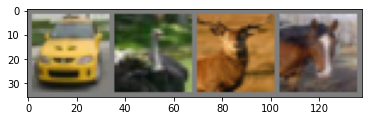

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]]) for j in range(4))

In [26]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x 


net = Net()

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [29]:
for epoch in range(2):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
          print('[%d, %5d] loss: %.3f' %
               (epoch + 1, i + 1, running_loss / 2000))
          running_loss = 0.0

          
print('Finished Training')

[1,  2000] loss: 1.862
[1,  4000] loss: 1.669
[1,  6000] loss: 1.572
[1,  8000] loss: 1.515
[1, 10000] loss: 1.452
[1, 12000] loss: 1.416
[2,  2000] loss: 1.369
[2,  4000] loss: 1.331
[2,  6000] loss: 1.296
[2,  8000] loss: 1.288
[2, 10000] loss: 1.258
[2, 12000] loss: 1.244
Finished Training


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

